<a href="https://colab.research.google.com/github/umesh755485/Handwritten-Digit-Recognition-System-/blob/main/Handwritten%20Digit%20Recognition%20System%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install numpy pandas matplotlib tensorflow scikit-learn


Data Loading & Exploration


In [3]:
from tensorflow.keras.datasets import mnist
import numpy as np

(X_train, y_train), (X_test, y_test) = mnist.load_data()


print(f"Training data shape: {X_train.shape}")
print(f"Test labels: {np.unique(y_test)}")

Training data shape: (60000, 28, 28)
Test labels: [0 1 2 3 4 5 6 7 8 9]


Data Preprocessing

In [4]:
X_train = X_train / 255.0
X_test = X_test / 255.0

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)


Model Building (CNN)

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training & Evaluation

In [6]:
# Train for 5 epochs
history = model.fit(X_train, y_train, epochs=5, validation_split=0.2)

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc*100:.2f}%")


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.9072 - loss: 0.3132 - val_accuracy: 0.9784 - val_loss: 0.0705
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 24ms/step - accuracy: 0.9840 - loss: 0.0554 - val_accuracy: 0.9818 - val_loss: 0.0622
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.9899 - loss: 0.0326 - val_accuracy: 0.9850 - val_loss: 0.0541
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 0.9940 - loss: 0.0197 - val_accuracy: 0.9855 - val_loss: 0.0548
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 24ms/step - accuracy: 0.9960 - loss: 0.0127 - val_accuracy: 0.9863 - val_loss: 0.0534
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9846 - loss: 0.0522
Test Accuracy: 98.75%


Prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


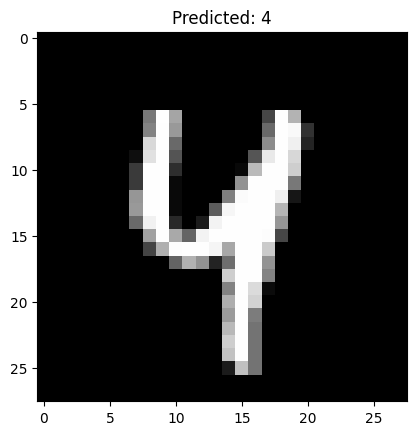

In [8]:
import matplotlib.pyplot as plt


idx = 42
plt.imshow(X_test[idx].reshape(28,28), cmap='gray')
plt.title(f"Predicted: {np.argmax(model.predict(X_test[idx:idx+1]))}")
plt.show()
